In [30]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#electronic_rating_data = pd.read_csv("ratings_Electronics.csv")
erd = pd.read_csv("ratings_Electronics.csv", sep = ',', names=['userId','productId','userRating','timestamp'])  
erd.head() 
# We can see no column names are present.
# Adding the names while reading the csv 

,userId,productId,userRating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## Exploratory Data Analytics
### Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

In [3]:
erd.head(20)

,userId,productId,userRating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [5]:
erd.info()
# We can see high memory usage so dropping the timestamp column
erd = erd.drop(['timestamp'] , axis='columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId        object
productId     object
userRating    float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [37]:
erd.dtypes

userId         object
productId      object
userRating    float64
dtype: object

In [7]:
erd.info()
# Some memory is released. From 238 Mb to 179Mb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId        object
productId     object
userRating    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


(array([ 901765.,       0.,  456322.,       0.,       0.,  633073.,
              0., 1485781.,       0., 4347541.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

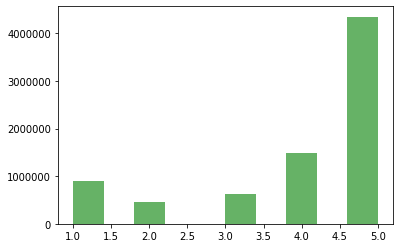

In [9]:
x = erd['userRating']
plt.hist(x, 10,
         density=False,
         histtype='bar',
         facecolor='g',
         alpha=0.6)
# We can see too many 5 and 4 ratings and least are the 2 ratings

Take a subset of the dataset to make it less sparse/ denser. ( For example,
keep the users only who has given 50 or more number of ratings )

In [ ]:
#ratingcount = pd.DataFrame(erd.groupby('userId')['userRating'].mean()) 

In [ ]:
#ratingcount

In [ ]:
#ratingcount['rating_count'] = pd.DataFrame(erd.groupby('userId')['Rating'].count())  

In [44]:
#ratingcount.info

In [24]:
erdnt = erderd.groupby('userId').filter(lambda x:x['userRating'].count() > 20)
# considering users who have given 20 reviews

In [25]:
erdnt

,userId,productId,userRating
17,A1H8PY3QHMQQA0,0528881469,2.0
94,A3BY5KCNQZXV5U,0594451647,5.0
113,A2QBZA4S1ROX9Q,0594481813,3.0
118,AT09WGFUM934H,0594481813,3.0
158,A2E14J26DQZOAA,0777700018,5.0
...,...,...,...
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0
7824444,A2BYV7S1QP2YIG,B00LKG1MC8,5.0
7824449,A20MBPLK731VHY,B00LMCPYPG,1.0


In [46]:
erdnt.describe().transpose

<bound method DataFrame.transpose of           userRating
count  425240.000000
mean        4.242181
std         1.132217
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000>

In [55]:
erdnf = erd.groupby('userId').filter(lambda x:x['userRating'].count() > 49)
# considering users who have reviewed 50

In [56]:
erdnf

,userId,productId,userRating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [57]:
erdnf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userRating,125871.0,4.261339,1.062144,1.0,4.0,5.0,5.0,5.0


### Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [98]:
#trainset1, testset1 = train_test_split(erdnt, test_size=.3)
# Test Train split for the user with 20 ratings or more

In [100]:
#trainset, testset = train_test_split(erdnf, test_size=.3)
# Test Train split for the user with 50 ratings or more

AttributeError: 'DataFrame' object has no attribute 'raw_ratings'

### Popularity based Recommendation system
#### We will first start with the dataset where user have reviewed 50 products or more

In [60]:
# Sort the the products based on the reviews
erdnf = erdnf.sort_values('userRating', ascending=False)

In [61]:
erdnf

,userId,productId,userRating
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0
...,...,...,...
4220919,A35OIWPVTGW3UC,B004KKZ0H4,1.0
4220978,A1TY97ZGQT5FGF,B004KKZ0H4,1.0
2085186,ABMF4UC4Z00NT,B001IYCUM8,1.0
2836169,A28J3123I1QDKI,B002SRW3JY,1.0


In [67]:
sorted_erdnf = erdnf.groupby('productId')['userRating'].mean().sort_values(ascending = False)
sorted_erdnf
# we can see there are 47155 unique products
# Mean user rating for each product are represented below

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
             ... 
B000VJ0YQ0    1.0
B000MVEBOS    1.0
B000C0OF54    1.0
B005YXXT7Y    1.0
B0080REM4A    1.0
Name: userRating, Length: 48190, dtype: float64

In [76]:
top_50_prod_50 = erdnf.groupby('productId')['userRating'].count().sort_values(ascending = False).head(50)
print("Here are the top 50 products \n",top_50_prod_50)
print("** These products are liked by more than 62 users")
# Now I am representing the products with the total reviews it has received

Here are the top 50 products 
 productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
B008DWCRQW    137
B00829THK0    137
B002R5AM7C    128
B004CLYEDC    118
B002SZEOLG    113
B00834SJNA    110
B004T9RR6I    109
B002V88HFE    106
B0034CL2ZI    106
B00834SJSK    101
B002WE6D44    100
B00829TIA4     99
B004CLYEFK     97
B009SYZ8OC     95
B0079UAT0A     92
B0019EHU8G     90
B005CT56F8     87
B00DR0PDNE     84
B000QUUFRW     84
B00HFRWWAM     82
B005FYNSPK     81
B004CLYEE6     80
B0041Q38NU     79
B001TH7GUU     78
B00ARB5FLQ     78
B002SQK2F2     77
B005HMKKH4     77
B004CLYEH8     76
B00AQRUW4Q     76
B0015DYMVO     76
B005CLPP84     74
B003M0NURK     74
B00004ZCJE     72
B000LRMS66     71
B000VX6XL6     70
B001E1Y5O6     70
B00BOHNYTW     69
B001XURP7W     69
B001CHHVCU     67
B0002L5R78     67
B00884WH74     66
B000JMJWV2     64
B0082E9K7U     64
B004QK7HI8     64
B00BOHNYU6     63
Name: userRating, dtype: int64
** These products are liked 

##### Popularity based dataset where user have reviewed 20 products or more

In [74]:
erdnt = erdnt.sort_values('userRating', ascending=False)
erdnt

,userId,productId,userRating
2365496,A339NU1P1IUU03,B001V6YCPQ,5.0
475677,A2FEWR4OVNEXNU,B0002J2MV4,5.0
476958,AAJPPSAUBPKOB,B0002JFN10,5.0
476992,A1Q33MTP73V4QJ,B0002JFN10,5.0
476995,A3IRE552497R6O,B0002JFN10,5.0
...,...,...,...
6824419,A3CP1WGNTOSKDA,B00A4BEG8M,1.0
1812592,A382255V1SAQEJ,B0019BEJQA,1.0
5183439,A1W9UJ28FABCBT,B005TH9Q3Q,1.0
2347370,A2ZCXIZHS191TG,B001UE8LU6,1.0


In [75]:
sorted_erdnt = erdnt.groupby('productId')['userRating'].mean().sort_values(ascending = False)
sorted_erdnt

productId
B00065HLXS    5.0
B001EBOQBS    5.0
B005289RU4    5.0
B00527XI28    5.0
B00527W5B8    5.0
             ... 
B003O7CNCO    1.0
B003O85BGS    1.0
B00008AZGX    1.0
B003O85BSQ    1.0
B00361ET0M    1.0
Name: userRating, Length: 111188, dtype: float64

In [78]:
top_50_prod_20 = erdnt.groupby('productId')['userRating'].count().sort_values(ascending = False).head(50)
print("Here are the top 50 products \n",top_50_prod_20)
print("** These products are liked by more than 200 users")

Here are the top 50 products 
 productId
B007WTAJTO    822
B003ES5ZUU    712
B00DR0PDNE    499
B002WE6D44    492
B002V88HFE    469
B0019EHU8G    467
B0088CJT4U    443
B009SYZ8OC    416
B000QUUFRW    385
B0002L5R78    375
B000N99BBC    350
B005FYNSPK    347
B0041Q38NU    346
B002SZEOLG    333
B005HMKKH4    327
B005CT56F8    318
B00BGGDVOO    316
B000VX6XL6    315
B003ELYQGG    304
B00834SJNA    291
B00829TIEK    288
B001TH7GUU    287
B005DKZTMG    282
B00004ZCJE    273
B00829THK0    273
B0015DYMVO    270
B006W8U2MU    270
B000LRMS66    267
B004T9RR6I    265
B00007E7JU    264
B0034CL2ZI    257
B001XURP7W    257
B005CLPP84    255
B0052SCU8U    255
B00829TIA4    251
B00834SJSK    246
B004QK7HI8    238
B004G6002M    237
B004W2JKWG    236
B001TH7GSW    229
B00E3W15P0    227
B008DWCRQW    222
B003M0NURK    221
B002QEBMAK    219
B000BQ7GW8    216
B004XC6GJ0    214
B007I5JT4S    207
B000FBK3QK    206
B000JMJWV2    206
B004GF8TIK    199
Name: userRating, dtype: int64
** These products are liked 

## Build Collaborative Filtering model

In [103]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

In [110]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(erdnf,reader)
data1 = Dataset.load_from_df(erdnt,reader)
trainset, testset = train_test_split(data, test_size=.3)
trainset1, testset1 = train_test_split(data1, test_size=.3)
print("Train where users have rated more than 50 : Number of users:\t{}".format(trainset.n_users))
print("Train where users have rated more than 20:  Number of users:\t{}".format(trainset1.n_users))

Train where users have rated more than 50 : Number of users:	1540
Train where users have rated more than 20:	12011


In [122]:
# We will first start with user-based collaboration filtering with pearson similarity on user rating > 50 dataset
algo_pearson = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_pearson.fit(trainset) 

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [123]:
test_pred_pearson = algo_pearson.test(testset)
test_pred_pearson

[Prediction(uid='A2DG63DN704LOI', iid='B00EDCF0MY', r_ui=4.0, est=4.8976545742854265, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='A2V1J3JT5OOZFO', iid='B002GR1YZ0', r_ui=5.0, est=4.066666666666666, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3639Z6O5JBLIZ', iid='B009CF424O', r_ui=5.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ASCBJEPXTOU0V', iid='B008DWH00K', r_ui=1.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2FSOHSM9X13JT', iid='B00BOTAI0I', r_ui=5.0, est=4.574074074074074, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1DO9LRCO23EOM', iid='B000V1MLBE', r_ui=1.0, est=4.6, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A215WH6RUDUCMP', iid='B006WHPQDG', r_ui=5.0, est=4.589743589743589, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A11KQADBYE0UZL', iid='B00539LP34', r

In [124]:
#Get RMSE
print("User Based Model : Test Set")
accuracy.rmse(test_pred_pearson,verbose=True)

User Based Model : Test Set
RMSE: 1.0593


1.0592918855534013

In [140]:
#Get MAE
accuracy.mae(test_pred_pearson,verbose=True)

MAE:  0.7800


0.7799753918431552

In [126]:
# user-based collaboration filtering with cosine similarity on user rating > 50 dataset
algo_cosine = KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': True})
algo_cosine.fit(trainset) 

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [127]:
test_pred_cosine = algo_cosine.test(testset)
test_pred_cosine

[Prediction(uid='A2DG63DN704LOI', iid='B00EDCF0MY', r_ui=4.0, est=4.783629842687083, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid='A2V1J3JT5OOZFO', iid='B002GR1YZ0', r_ui=5.0, est=4.066666666666666, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3639Z6O5JBLIZ', iid='B009CF424O', r_ui=5.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ASCBJEPXTOU0V', iid='B008DWH00K', r_ui=1.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2FSOHSM9X13JT', iid='B00BOTAI0I', r_ui=5.0, est=3.5740740740740744, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1DO9LRCO23EOM', iid='B000V1MLBE', r_ui=1.0, est=4.613445193172954, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid='A215WH6RUDUCMP', iid='B006WHPQDG', r_ui=5.0, est=4.24974358974359, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A11KQADBYE0UZL', iid='B

In [129]:
#Get RMSE
print("User Based Model : Test Set")
accuracy.rmse(test_pred_cosine,verbose=True)

User Based Model : Test Set
RMSE: 1.0620


1.061979933633691

In [141]:
# Get MAE
print("MAE :", accuracy.mae(test_pred_cosine, verbose=True))

MAE:  0.7675
MAE : 0.7675396306190168


### We will Now try it with users who gave rating more than 20

In [134]:
algo_pearson1 = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_pearson1.fit(trainset1) 

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [135]:
test_pred_pearson1 = algo_pearson.test(testset1)
test_pred_pearson1

[Prediction(uid='A33HIV8RXRDM88', iid='B002P3KH80', r_ui=5.0, est=4.994288320701744, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A3MDA891A1EPT8', iid='B00HPMCO4Q', r_ui=4.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A114AF5JBAWGGT', iid='B005IHAIDO', r_ui=4.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AIEOH19T22OQC', iid='B002MSNS4S', r_ui=5.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1PAGHECG401K1', iid='B000BQ7GW8', r_ui=5.0, est=4.9984248755693255, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A3M82NO6OU1FHS', iid='B004NQU4YY', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AN9J46667D80O', iid='B00H4OWPE4', r_ui=5.0, est=4.264218184294453, details={'was_impossible': True, 'reason'

In [136]:
#Get RMSE for user who rated more than 20 for pearson
print("User Based Model : Test Set")
accuracy.rmse(test_pred_pearson1,verbose=True)

User Based Model : Test Set
RMSE: 1.0221


1.0220765737460715

In [142]:
# Get MAE
print("MAE :", accuracy.mae(test_pred_pearson1, verbose=True))

MAE:  0.7063
MAE : 0.706273332395833


In [137]:
# user-based collaboration filtering with cosine similarity on user rating > 20 dataset
algo_cosine1 = KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': True})
algo_cosine1.fit(trainset1) 

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [138]:

test_pred_cosine1 = algo_cosine.test(testset1)
test_pred_cosine1

[Prediction(uid='A33HIV8RXRDM88', iid='B002P3KH80', r_ui=5.0, est=4.663291767906768, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='A3MDA891A1EPT8', iid='B00HPMCO4Q', r_ui=4.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A114AF5JBAWGGT', iid='B005IHAIDO', r_ui=4.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AIEOH19T22OQC', iid='B002MSNS4S', r_ui=5.0, est=4.264218184294453, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1PAGHECG401K1', iid='B000BQ7GW8', r_ui=5.0, est=4.3482178248349435, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='A3M82NO6OU1FHS', iid='B004NQU4YY', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AN9J46667D80O', iid='B00H4OWPE4', r_ui=5.0, est=4.264218184294453, details={'was_impossible': True, 'reason

In [139]:
#Get RMSE for user who rated more than 20 for cosine
print("User Based Model : Test Set")
accuracy.rmse(test_pred_cosine1,verbose=True)

User Based Model : Test Set
RMSE: 1.0609


1.0609196059474622

In [143]:
# Get MAE
print("MAE :", accuracy.mae(test_pred_cosine1, verbose=True))

MAE:  0.7807
MAE : 0.7806825067368803


### Item item based with user who rated more than 100 due to memory issues

In [130]:
erdnh = erd.groupby('userId').filter(lambda x:x['userRating'].count() > 99)

In [131]:
data2 = Dataset.load_from_df(erdnt,reader)
trainset2, testset2 = train_test_split(data2, test_size=.3)

In [144]:
# We will now start with item-based collaboration filtering with pearson similarity on user rating > 50 dataset
algo_pearson_item = KNNWithMeans(k=20, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_pearson_item.fit(trainset2) 

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


MemoryError: 

In [133]:
# Item based cosine similarity
algo_cosine_item = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': False})
algo_cosine_item.fit(trainset2) 

Computing the cosine similarity matrix...


MemoryError: 

Get top - K ( K = 5) recommendations. Since our goal is to recommend
new products for each user based on his/her habits, we will recommend
5 new products.

In [153]:
from collections import defaultdict
predictions = algo.test(testset)

In [149]:
def get_top_n(predictions, n=10):
    # map predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    #sorting the predictions and getting the k highest
    for uid, userRating in top_n.items():
        userRating.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = userRating[:n]
        
    return top_n

In [154]:
top_n = get_top_n(test_pred_cosine1, n=5)

In [155]:
top_n

defaultdict(list,
            {'A33HIV8RXRDM88': [('B0014175OI', 5),
              ('B000063EMD', 5),
              ('B00005LEN4', 4.843860533551024),
              ('B005DSPLCQ', 4.8093154561396405),
              ('B0002CPBWI', 4.783442272187305)],
             'A3MDA891A1EPT8': [('B00HPMCO4Q', 4.264218184294453),
              ('B008F8DGJQ', 4.264218184294453),
              ('B005HTIWF4', 4.264218184294453),
              ('B00CNZP7H6', 4.264218184294453),
              ('B005GOINEK', 4.264218184294453)],
             'A114AF5JBAWGGT': [('B005IHAIDO', 4.264218184294453),
              ('B000BFO4OC', 4.264218184294453),
              ('B000AO3L84', 4.264218184294453),
              ('B000ACGQI8', 4.264218184294453),
              ('B000C0OF54', 4.264218184294453)],
             'AIEOH19T22OQC': [('B002MSNS4S', 4.264218184294453),
              ('B000094Q77', 4.264218184294453),
              ('B0006O4VNC', 4.264218184294453),
              ('B000GIPHNG', 4.264218184294453),
        

# SUMMARY

So we figured out Popularity based recommendation systems and Collaboration Based recommendation System
I found out the Popular recommendations and suggested top 20 products.
Then in Collaborative Recommendation:
1 - First I built the model with Users who rated 50 products
    With Pearson 
    Got RMSE: 1.0593
    Got MAE:  0.7800
    with Cosine
    Got RMSE: 1.0620
    Got MAE:  0.7675
2 - Second I built the model with Users who rated 20 products
    Got RMSE: 1.0221
    Got MAE:  0.7800
    With Cosine
    Got RMSE: 1.0609
    Got MAE:  0.7807
   